In [1]:
import sqlite3 as sql
import pandas as pd

con = sql.connect("C:/sql/databases/steam_game.db")

cur = con.cursor()

query = """
SELECT *
FROM sqlite_master
WHERE type = 'table'
;"""

results = cur.execute(query).fetchall()
print(results)

[('table', 'Data', 'Data', 2, 'CREATE TABLE Data (\n        ID INTEGER PRIMARY KEY AUTOINCREMENT,\n        Title TEXT NOT NULL,\n        Original_price FLOAT NOT NULL,\n        Date DATE NOT NULL,\n        Promo_price FLOAT NOT NULL,\n        Link TEXT NOT NULL,\n        Release_date INT,\n        Review TEXT NOT NULL \n        )'), ('table', 'sqlite_sequence', 'sqlite_sequence', 3, 'CREATE TABLE sqlite_sequence(name,seq)')]


In [2]:
tables=  pd.read_sql("""SELECT * FROM sqlite_master WHERE type = 'table';""",con)

for table in tables['name']:
    print(table)

Data
sqlite_sequence


In [3]:
df = pd.read_sql("""SELECT Title,Review FROM Data;""",con)
df.head(10)


,Title,Review
0,Raft,"93% of the 165,092 user reviews for this game ..."
1,Warframe,"90% of the 483,262 user reviews for this game ..."
2,MONSTER HUNTER RISE,"86% of the 27,429 user reviews for this game a..."
3,F1® 22,"66% of the 5,568 user reviews for this game ar..."
4,The Sims™ 4,"87% of the 52,182 user reviews for this game a..."
5,Destiny 2,"83% of the 478,505 user reviews for this game ..."
6,Sea of Thieves,"90% of the 198,561 user reviews for this game ..."
7,Rust,"87% of the 653,303 user reviews for this game ..."
8,Apex Legends™,"86% of the 479,747 user reviews for this game ..."
9,FINAL FANTASY XIV Online,"88% of the 53,326 user reviews for this game a..."


In [4]:
halo = """
SELECT *
FROM Data
WHERE Title = "Halo: The Master Chief Collection"
GROUP BY Title;"""
pd.read_sql_query(halo, con)


###Nice

,ID,Title,Original_price,Date,Promo_price,Link,Release_date,Review
0,111,Halo: The Master Chief Collection,39.99,2022-07-17,0.0,https://store.steampowered.com/app/976730/Halo...,2019,"92% of the 173,740 user reviews for this game ..."


In [5]:
cur.close()
con.close()



df.isna().sum()
df['Title'].head(10)
df['Review'].head(10)

0    93% of the 165,092 user reviews for this game ...
1    90% of the 483,262 user reviews for this game ...
2    86% of the 27,429 user reviews for this game a...
3    66% of the 5,568 user reviews for this game ar...
4    87% of the 52,182 user reviews for this game a...
5    83% of the 478,505 user reviews for this game ...
6    90% of the 198,561 user reviews for this game ...
7    87% of the 653,303 user reviews for this game ...
8    86% of the 479,747 user reviews for this game ...
9    88% of the 53,326 user reviews for this game a...
Name: Review, dtype: object

In [6]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
import string
import pandas as pd
import warnings
import demoji
nltk.download("punkt")
nltk.download("wordnet")
nltk.download("stopwords")


df['Review'] = df['Review'].str.lower()

df['Title'].head(10)
df['Title'] = df['Title'].str.replace(r'[0-9a-zA-Z]+','')
df['Title']



def clean_text(text):
    
    text = str(text).lower()
    
    text = re.sub(r'<.*?>', '',text)
    
    text = re.sub('https?://\S+|www\.\S+', '', text)

    text = demoji.replace(text,'')

    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    
    text = re.sub(r'\@w+|\#','',text)
    

    
    
    return text

df['Title'] = df['Title'].apply(clean_text)
df['Title'].head(10)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\katsa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\katsa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\katsa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0                        raft
1                    warframe
2         monster hunter rise
3                       f1 22
4                  the sims 4
5                   destiny 2
6              sea of thieves
7                        rust
8                apex legends
9    final fantasy xiv online
Name: Title, dtype: object

In [7]:

sw = set(stopwords.words("english"))


def remove_stopwords(text):
    tokens = word_tokenize(text)
    cleaned_tokens = [word for word in tokens if word.lower() not in sw]
    return " ".join(cleaned_tokens)

df['Review'] = df['Review'].apply(remove_stopwords)

df['Title'] = df['Title'].apply(remove_stopwords)


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\katsa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


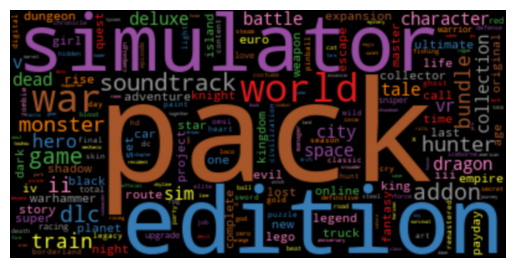

In [8]:
from nltk.stem import WordNetLemmatizer
nltk.download("wordnet")



lemma = WordNetLemmatizer()


def lem_text(text):
    tokens = word_tokenize(text)
    lem_tokens = [lemma.lemmatize(token) for token in tokens]
    return " ".join(lem_tokens)


df['Title'] = df['Title'].apply(lem_text)




text = " ".join(i for i in df['Title'])

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textblob import TextBlob

blob = TextBlob(text).words

wc = WordCloud(colormap="Set1",collocations=False).generate(text)
plt.imshow(wc,interpolation="bicubic")
plt.axis("off")
plt.show()

In [9]:
from nltk.probability import FreqDist

vac_dis = FreqDist(blob)
top_50_most_used_words = vac_dis.most_common(50)
print(top_50_most_used_words)


[('2', 1323), ('pack', 1188), ('edition', 629), ('simulator', 587), ('world', 401), ('war', 367), ('3', 365), ('soundtrack', 278), ('game', 257), ('4', 256), ('dlc', 255), ('addon', 251), ('ii', 234), ('monster', 223), ('hunter', 216), ('train', 203), ('bundle', 198), ('hero', 178), ('vr', 159), ('deluxe', 153), ('dead', 143), ('character', 142), ('dragon', 140), ('battle', 139), ('city', 137), ('5', 135), ('collection', 135), ('tale', 132), ('space', 132), ('v', 130), ('expansion', 130), ('truck', 126), ('adventure', 125), ('legend', 124), ('dark', 124), ('warhammer', 121), ('1', 120), ('ultimate', 119), ('star', 117), ('dungeon', 115), ('life', 115), ('king', 108), ('route', 106), ('story', 102), ('complete', 100), ('super', 100), ('time', 99), ('set', 99), ('kingdom', 98), ('empire', 97)]


In [10]:
def polarity(text):
    return TextBlob(text).polarity



df['polarity'] = df['Title'].apply(polarity)



def sentiment(label):
    if label <0:
        return "Negative"
    elif label == 0:
        return "Neutral"
    elif label >= 0:
        return "Positive"


df['sentiment'] = df['polarity'].apply(sentiment)


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()


X = df['Title']
X = cv.fit_transform(X).toarray()
y = df['sentiment']
y = le.fit_transform(y)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=42)





from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
GNB = GaussianNB()
MNB = MultinomialNB()
BNB = BernoulliNB()

from sklearn.metrics import accuracy_score,classification_report

def model_(X_train,X_test,y_train,y_test,model):
    model = model.fit(X_train,y_train)
    pred = model.predict(X_test)
    acc = accuracy_score(y_test,pred)
    clf_rpt = classification_report(y_test, pred)
    print(f'{model.__class__.__name__}, --ACC-- {acc*100:.2f}%; --Classification Report-- {clf_rpt}')
    return pred

lr_pred = model_(X_train, X_test, y_train, y_test, lr)
GNB_pred = model_(X_train, X_test, y_train, y_test,GNB)
MNB_pred = model_(X_train, X_test, y_train, y_test, MNB)
BNB_pred = model_(X_train, X_test, y_train, y_test, BNB)

LogisticRegression, --ACC-- 96.10%; --Classification Report--               precision    recall  f1-score   support

           0       0.98      0.81      0.88       258
           1       0.96      1.00      0.98      2590
           2       0.98      0.77      0.86       307

    accuracy                           0.96      3155
   macro avg       0.97      0.86      0.91      3155
weighted avg       0.96      0.96      0.96      3155

GaussianNB, --ACC-- 50.36%; --Classification Report--               precision    recall  f1-score   support

           0       0.16      0.81      0.27       258
           1       0.95      0.47      0.63      2590
           2       0.27      0.52      0.36       307

    accuracy                           0.50      3155
   macro avg       0.46      0.60      0.42      3155
weighted avg       0.82      0.50      0.57      3155

MultinomialNB, --ACC-- 92.96%; --Classification Report--               precision    recall  f1-score   support

          

In [11]:
X = df['Title']
y = df['sentiment']
y = le.fit_transform(y)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=1)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Embedding,SpatialDropout1D,Bidirectional,Dropout

from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()

tokenizer.fit_on_texts(X_train)

word_index = tokenizer.word_index
print(len(word_index))

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)



max_length = 0
for sequence in X_train:
    sequence_length = len(sequence)
    if sequence_length > max_length:
        max_length = sequence_length

print("Max Length of Sequences: ",max_length)




from tensorflow.keras.utils import pad_sequences,to_categorical

X_train = pad_sequences(X_train,max_length,padding="post")
X_test = pad_sequences(X_test,max_length,padding="post")

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


RNN = Sequential()
RNN.add(Embedding(len(word_index) + 1, output_dim=100, input_length=max_length))
RNN.add(SpatialDropout1D(0.3))
RNN.add(Bidirectional(LSTM(10,dropout=0.1,recurrent_dropout=0.1)))
RNN.add(Dropout(0.1))
RNN.add(Dense(50,activation='relu'))
RNN.add(Dropout(0.1))
RNN.add(Dense(3,activation='softmax'))
RNN.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = RNN.fit(X_train,y_train,batch_size=32,epochs=10,validation_split=(0.1))


10563
Max Length of Sequences:  15
Epoch 1/10


C:\Users\katsa\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


378/378 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.8086 - loss: 0.6121 - val_accuracy: 0.8896 - val_loss: 0.2429
Epoch 2/10
378/378 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9109 - loss: 0.1995 - val_accuracy: 0.9650 - val_loss: 0.1253
Epoch 3/10
378/378 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9781 - loss: 0.0658 - val_accuracy: 0.9799 - val_loss: 0.0917
Epoch 4/10
378/378 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9923 - loss: 0.0232 - val_accuracy: 0.9843 - val_loss: 0.0846
Epoch 5/10
378/378 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9977 - loss: 0.0103 - val_accuracy: 0.9858 - val_loss: 0.0855
Epoch 6/10
378/378 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9973 - loss: 0.0085 - val_accuracy: 0.9858 - val_loss: 0.0844
Epoch 7/10
378/378 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9983 - loss: 0.0051 - val_accuracy: 0.9858 - val_loss: 0.0899
Epoch 8/10
378/378 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9990 - loss: 0.0043 - val_accuracy: 

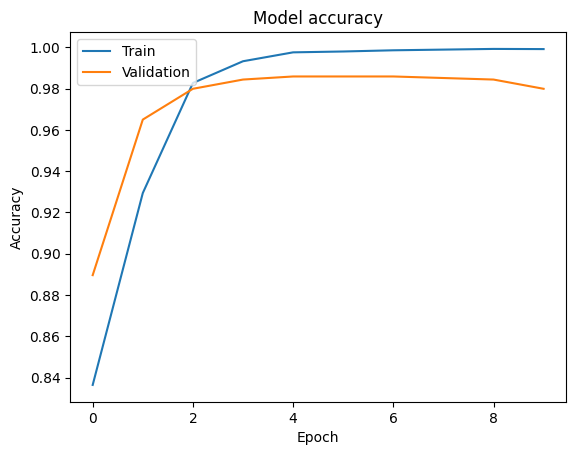

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


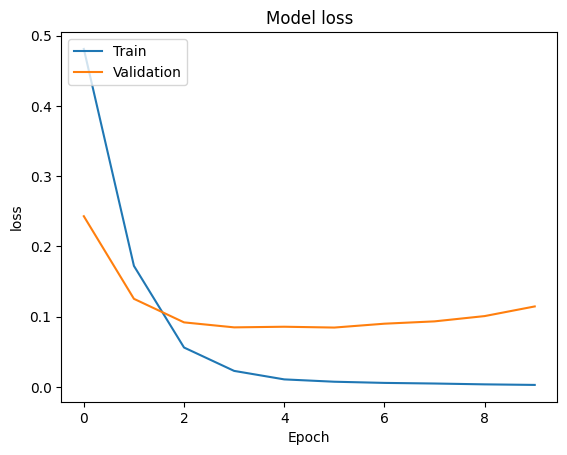

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
#################            THIS IS PEDANTIC AND SUS########################################################